In [1]:
import util

In [3]:
X_accepted = util.read_textfile('acceptscores.txt')
X_rejection =  util.read_textfile('rejectscores.txt')

In [4]:
print(X_accepted.shape)
print(X_rejection.shape)

(749, 6)
(582, 6)


In [6]:
import numpy as np
print(np.mean(X_accepted,axis=0))
print(np.mean(X_rejection,axis=0))

[4.58851802 4.58638184 4.64025367 4.05393858 0.16989319 0.01361816]
[3.43041237 3.4161512  3.3862543  3.00180412 0.11443299 0.        ]


In [9]:
t = np.zeros((749,6))
t[X_accepted[:,5]!=0] = 1

In [10]:
for i in X_accepted:
    if i[5]!=0:
        print(i)

[4.15 3.3  5.15 4.95 5.35 5.1 ]
[4.75 5.75 4.35 4.4  5.   5.1 ]


In [14]:
Y_accepted = np.zeros((len(X_accepted),2))
Y_accepted[:,0] = 1
Y_rejection = np.zeros((len(X_rejection),2))
Y_rejection[:,1] = 1 


In [17]:
Y_accepted.shape

(749, 2)

In [20]:
X = np.vstack((X_accepted,X_rejection))
Y = np.vstack((Y_accepted,Y_rejection))

In [22]:
Y.shape

(1331, 2)

In [24]:
from sklearn.cross_validation import StratifiedKFold
eva_size = 0.20
kf = StratifiedKFold(np.argmax(Y,axis=1),round(1./eva_size))
train_index,valid_index = next(iter(kf))

In [25]:
X_train,y_train = X[train_index],Y[train_index]
X_test,y_test = X[valid_index],Y[valid_index]

In [30]:
np.sum(y_train,axis=0)

array([599., 465.])

In [31]:
kf

sklearn.cross_validation.StratifiedKFold(labels=[0 0 0 ... 1 1 1], n_folds=5, shuffle=False, random_state=None)

In [32]:
train_index,valid_index = next(iter(kf))
X_train,y_train = X[train_index],Y[train_index]
X_test,y_test = X[valid_index],Y[valid_index]

In [34]:
np.sum(y_test,axis=0)

array([150., 117.])

In [44]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100,n_jobs=-1)
clf.fit(X_train,y_train)
#y_pred = clf.transform(X_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [56]:
print(np.round(clf.feature_importances_*100))

[24. 28. 28. 19.  1.  0.]


In [58]:
clf.score(X_test, y_test)

0.8764044943820225

In [64]:
y_pred=clf.predict(X_test)

In [67]:
from sklearn.metrics import confusion_matrix
confusion_matrix(np.argmax(y_test,axis=1), np.argmax(y_pred,axis=1))

array([[137,  13],
       [ 20,  97]])

In [105]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X[:,0:6],np.ravel(np.argmax(Y,axis=1)), cv=10)
np.mean(scores)

0.8617536038195898

In [94]:
np.mean(scores)

0.8489563460891034

In [103]:
clf_ada = AdaBoostClassifier(n_estimators=100)
scores = cross_val_score(clf_ada, X,np.ravel(np.argmax(Y,axis=1)), cv=10)
print(np.mean(scores))

0.8865092684220729


In [109]:
from sklearn import svm
clf_svm = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf_svm, X,np.ravel(np.argmax(Y,axis=1)), cv=10)
print(np.mean(scores))

0.8647553415424586


In [108]:
from sklearn import svm
clf_svm = svm.SVC(kernel='rbf', C=1)
scores = cross_val_score(clf_svm, X,np.ravel(np.argmax(Y,axis=1)), cv=10)
print(np.mean(scores))

0.8872670142112403


In [132]:
from sklearn import svm
clf_svm = svm.SVC(kernel='poly', C=1)
scores = cross_val_score(clf_svm, X,np.ravel(np.argmax(Y,axis=1)), cv=5)
print(np.mean(scores))

0.8850320628792673


In [131]:
from sklearn.neighbors import KNeighborsClassifier
clf_neigh = KNeighborsClassifier(n_neighbors=45)
scores = cross_val_score(clf_neigh, X,np.ravel(np.argmax(Y,axis=1)), cv=5)
print(np.mean(scores))

0.8865301052079


In [130]:
from sklearn.neural_network import MLPClassifier
clf_mlp =MLPClassifier(hidden_layer_sizes=(50, 50),alpha=1)
scores = cross_val_score(clf_mlp, X,np.ravel(np.argmax(Y,axis=1)), cv=5)
print(np.mean(scores))

0.8670403696330077


In [129]:
from sklearn.tree import DecisionTreeClassifier
clf_dt =DecisionTreeClassifier(max_depth=50)
scores = cross_val_score(clf_dt, X,np.ravel(np.argmax(Y,axis=1)), cv=5)
print(np.mean(scores))

0.8309358088883435


In [128]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
clf_gaussian =GaussianProcessClassifier(1.0 * RBF(1.0))
scores = cross_val_score(clf_gaussian, X,np.ravel(np.argmax(Y,axis=1)), cv=10)
print(np.mean(scores))

KeyboardInterrupt: 

In [349]:
X_new = np.zeros((len(X),11))
count = 0
addon = 0
for i in X:
    #X_new[count,0:6]= i
    X_new[count,addon+0] = i[i.nonzero()].mean()
    X_new[count,addon+1] = i[i.nonzero()].std()
    #X_new[count,addon+2] = np.ptp(i[i.nonzero()])
    temp = np.ptp(i[i.nonzero()])
    if(temp == 0):
        X_new[count,addon+2] = np.max(X_new[:,addon+2])
    else:
        X_new[count,addon+2] = X_new[count,addon+0]*(1.0/(temp+0.00001))
    a = i    
    
    X_new[count,addon+3] = np.sum(np.logical_and(a>0.1, a<=1))
    X_new[count,addon+4] = np.sum(np.logical_and(a>1, a<=2))
    X_new[count,addon+5] = np.sum(np.logical_and(a>2, a<=3))
    X_new[count,addon+6] = np.sum(np.logical_and(a>3, a<=4))
    X_new[count,addon+7] = np.sum(np.logical_and(a>4, a<=5))
    X_new[count,addon+8] = np.sum(np.logical_and(a>5, a<=6))
    X_new[count,addon+9] = np.max(i[i.nonzero()])
    X_new[count,addon+10] = np.min(i[i.nonzero()])
    '''
    X_new[count,addon+3] = np.sum(np.logical_and(a>0.1, a<=3))
    X_new[count,addon+4] = np.sum(np.logical_and(a>3, a<=6))
    '''
    count +=1
    

In [254]:
np.min(X[X>0])

1.0

In [139]:
np.std([3.15,4.2,4.65])

0.6284902544988269

In [155]:
acc_hist=np.histogram(X_new[0:749,6],bins=20)
reject_hist=np.histogram(X_new[750:-1,6],bins=20)


In [161]:
acc_hist[0].shape

(20,)

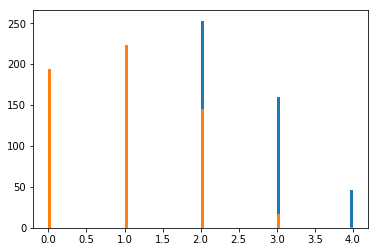

In [257]:
plt.hist(X_new[0:749,7], bins=100)
plt.hist(X_new[750:-1,7], bins=100)
plt.show()

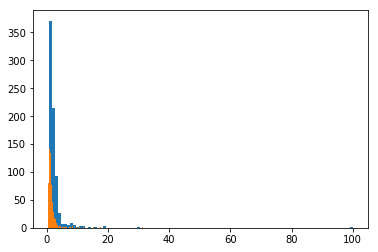

In [218]:
plt.hist(1/(X_new[0:749,1]+0.01), bins=100)
plt.hist(1/(X_new[750:-1,1]+0.01), bins=100)
plt.show()

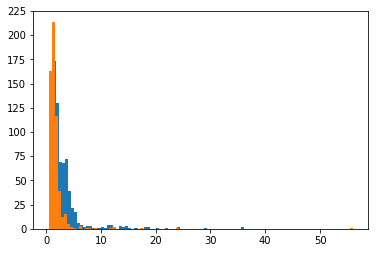

In [241]:
plt.hist(X_new[0:749,2], bins=100)
plt.hist(X_new[750:-1,2], bins=100)
plt.show()

In [168]:
print(np.min(X_new[0:749,6]))
print(np.min(X_new[750:-1,6]))

3.025
1.1875


In [378]:
#[0,1,3,4,5,6,7,8,9,10]X_new[:,[0,9,10]]
scores = cross_val_score(clf, X_new[:,[0,9,10]],np.ravel(np.argmax(Y,axis=1)), cv=10)
print(np.mean(scores))
print(scores)

0.87826146097945
[0.89552239 0.89552239 0.83458647 0.90225564 0.93984962 0.89473684
 0.82706767 0.87218045 0.84210526 0.87878788]


In [353]:
clf = RandomForestClassifier(n_estimators=100,n_jobs=-1)
clf.fit(X_new[:,[0,9,10]],np.ravel(np.argmax(Y,axis=1)))
print(np.round(clf.feature_importances_*100))

[52. 20. 28.]


In [377]:
clf_ada = AdaBoostClassifier(n_estimators=100)
scores = cross_val_score(clf_ada, X_new[:,[0,9,10]],np.ravel(np.argmax(Y,axis=1)), cv=10)
print(np.mean(scores))
print(scores)

0.8887989138381911
[0.88059701 0.8880597  0.84210526 0.89473684 0.93233083 0.90977444
 0.90225564 0.87969925 0.88721805 0.87121212]


In [375]:
clf_neigh = KNeighborsClassifier(n_neighbors=20)
scores = cross_val_score(clf_neigh,X_new[:,[0,9,10]],np.ravel(np.argmax(Y,axis=1)), cv=10)
print(np.mean(scores))
print(scores.T)

0.8895395714523758
[0.88059701 0.90298507 0.83458647 0.92481203 0.96240602 0.90225564
 0.87969925 0.87969925 0.85714286 0.87121212]


In [359]:
clf_mlp =MLPClassifier(hidden_layer_sizes=(50, 50),alpha=1)
scores = cross_val_score(clf_mlp, X_new[:,[0,1,9,10]],np.ravel(np.argmax(Y,axis=1)), cv=5)
print(np.mean(scores))

0.8872933765407796


In [358]:
clf_dt =DecisionTreeClassifier(max_depth=150)
scores = cross_val_score(clf_dt,X_new[:,[0,1,9,10]],np.ravel(np.argmax(Y,axis=1)), cv=5)
print(np.mean(scores))

0.8512254029179372


In [367]:
clf_svm = svm.SVC(kernel='poly', C=1)
scores = cross_val_score(clf_svm, X_new[:,[0,1,9,10]],np.ravel(np.argmax(Y,axis=1)), cv=10)
print(np.mean(scores))
print(scores.T)

0.8925469202177764
[0.88059701 0.8880597  0.84962406 0.92481203 0.95488722 0.92481203
 0.88721805 0.87218045 0.88721805 0.85606061]


In [361]:
clf_svm = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf_svm,X_new[:,[0,1,9,10]],np.ravel(np.argmax(Y,axis=1)), cv=5)
print(np.mean(scores))

0.887304661909172


In [364]:
clf_svm = svm.SVC(kernel='rbf', C=1)
scores = cross_val_score(clf_svm, X_new[:,[0,1,9,10]],np.ravel(np.argmax(Y,axis=1)), cv=10)
print(np.mean(scores))
print(scores)

0.8895225682931889
[0.87313433 0.91791045 0.83458647 0.92481203 0.94736842 0.90977444
 0.87969925 0.86466165 0.88721805 0.85606061]


In [368]:
scores

array([0.88059701, 0.8880597 , 0.84962406, 0.92481203, 0.95488722,
       0.92481203, 0.88721805, 0.87218045, 0.88721805, 0.85606061])

In [303]:
y_new = np.argmax(Y,axis=1)
print(y_new)

[0 0 0 ... 1 1 1]


In [331]:
X_mean = np.zeros((len(X),3))
count = 0
# addon = 0
for i in X:
    #X_new[count,0:6]= i
    X_mean[count,0] = count
    X_mean[count,1] = i[i.nonzero()].mean()
    X_mean[count,2] = y_new[count]
    #X_new[count,addon+1] = i[i.nonzero()].std()
    #X_new[count,addon+2] = np.ptp(i[i.nonzero()])
    count +=1
order=np.argsort(X_mean[:,1])
X_sorted = X_mean[order,:];

TypeError: argsort() got an unexpected keyword argument 'reversed'

In [381]:
X_sorted[782:-1,2:3]
np.sum(X_sorted[round(len(X)/2):len(X),2])
X_sorted[665]

array([236. ,   4.2,   0. ])

In [ ]:
# total number of papers 
n = len(X)
beta = 0.54
mu = 100
alpha = 0.01



